In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pd.options.display.max_columns = 25
pd.options.display.max_rows = 100

In [30]:
winery = pd.read_csv("../data/Winery_Data_Clean.csv")
winery.head()

,CustomerID,OrderID,CustomerSegment,Date,ZipCode,State,Sales2008,Sales2009,Sales2010,SaleAmount,Orders2008,Orders2009,Orders2010,YearAcquired,EmailSubscr,NewsletterSubscr,WinemakerCallSubscr,Division,Region,Channel
0,1,1532,High Roller,2008-07-08,33467,FL,213.0,30903.1,13340.94,44.0,4,8,4,2008,True,True,True,South Atlantic,South,TastingRoom
1,1,14378,High Roller,2008-10-05,33467,FL,213.0,30903.1,13340.94,47.0,4,8,4,2008,True,True,True,South Atlantic,South,TastingRoom
2,1,17690,High Roller,2008-10-26,33467,FL,213.0,30903.1,13340.94,57.0,4,8,4,2008,True,True,True,South Atlantic,South,Newsletter
3,1,19808,High Roller,2008-11-08,33467,FL,213.0,30903.1,13340.94,65.0,4,8,4,2008,True,True,True,South Atlantic,South,TastingRoom
4,1,25406,High Roller,2009-01-02,33467,FL,213.0,30903.1,13340.94,3889.0,4,8,4,2008,True,True,True,South Atlantic,South,TastingRoom


In [31]:
customer = pd.read_csv("../data/Winery_Customer.csv")
customer.head()
#len(customer)

,CustomerID,OrderVolume,CustomerSegment,ZipCode,State,SaleAmount,YearAcquired,EmailSubscr,NewsletterSubscr,WinemakerCallSubscr,Division,Region
0,1,16,High Roller,33467,FL,44457.05,2008,True,True,True,South Atlantic,South
1,2,9,High Roller,98683,WA,42201.67,2009,False,True,True,Pacific,West
2,3,8,High Roller,90247,CA,28393.50,2005,True,True,True,Pacific,West
3,4,7,Wine Enthusiast,4572,ME,23571.14,2008,True,True,True,New England,Northeast
4,5,5,Casual Visitor,98042,WA,20631.10,2008,False,False,False,Pacific,West


In [32]:
# Analyzing the distribution of customer segment counts across states, regions, and divisions.
# Is there a considerable difference in the distribution of customer segments across the USA?

print(winery.groupby("State")["CustomerSegment"].value_counts())
print(winery.groupby("Region")["CustomerSegment"].value_counts())
print(winery.groupby("Division")["CustomerSegment"].value_counts())

State  CustomerSegment
AK     Casual Visitor      88
       Luxury Estate       68
       High Roller         38
       Wine Enthusiast     34
AL     Casual Visitor     444
                         ... 
WV     Wine Enthusiast     27
WY     Casual Visitor     151
       Luxury Estate       70
       High Roller         60
       Wine Enthusiast     57
Name: count, Length: 200, dtype: int64
Region     CustomerSegment
Midwest    Casual Visitor      5855
           Luxury Estate       3344
           Wine Enthusiast     2468
           High Roller         2146
Northeast  Casual Visitor      3844
           Luxury Estate       2320
           Wine Enthusiast     1943
           High Roller         1485
South      Casual Visitor     11504
           Luxury Estate       6531
           Wine Enthusiast     5095
           High Roller         3776
West       Casual Visitor      5431
           Luxury Estate       3143
           Wine Enthusiast     2570
           High Roller         2262
Name:

In [33]:
segment_by_states = winery.groupby("State")["CustomerSegment"].value_counts()
segment_by_region = winery.groupby("Region")["CustomerSegment"].value_counts()
segment_by_division = winery.groupby("Division")["CustomerSegment"].value_counts()

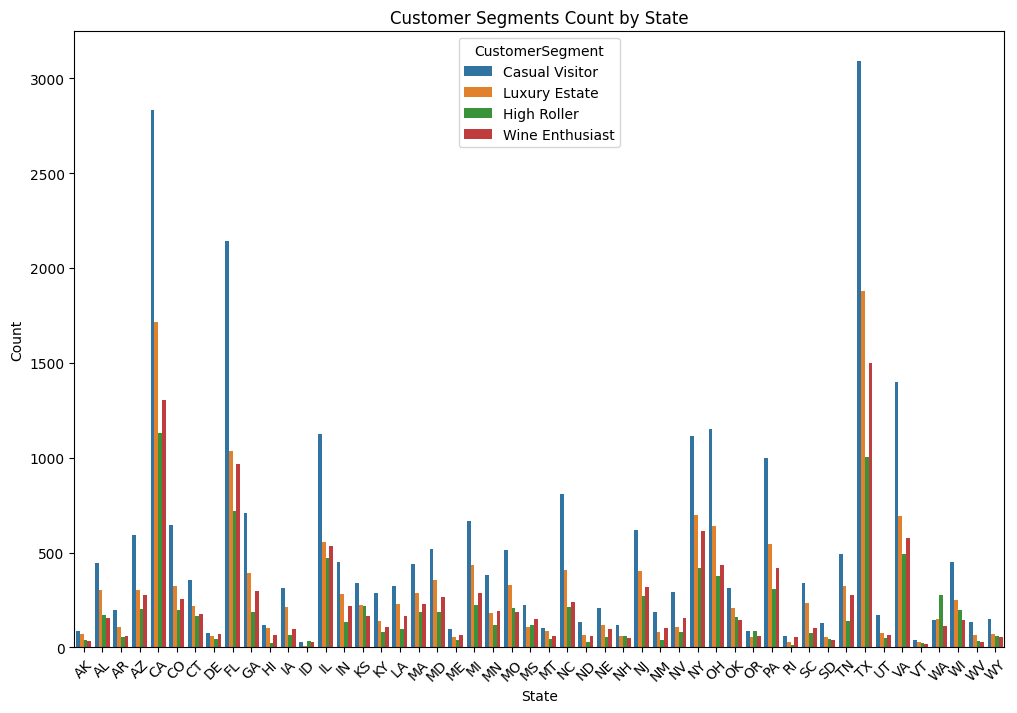

In [34]:
#State
segment_by_states_df = segment_by_states.reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Count', hue='CustomerSegment', data=segment_by_states_df)
plt.title('Customer Segments Count by State')
plt.xticks(rotation=45)
plt.show()

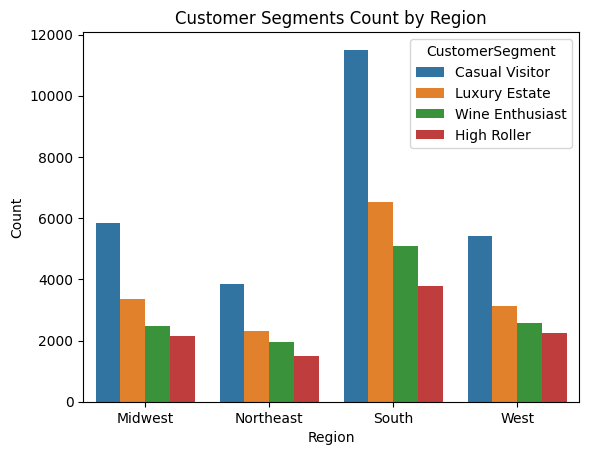

In [35]:
#Region
segment_by_region_df = segment_by_region.reset_index(name='Count')

sns.barplot(x='Region', y='Count', hue='CustomerSegment', data=segment_by_region_df)
plt.title('Customer Segments Count by Region')
plt.show()

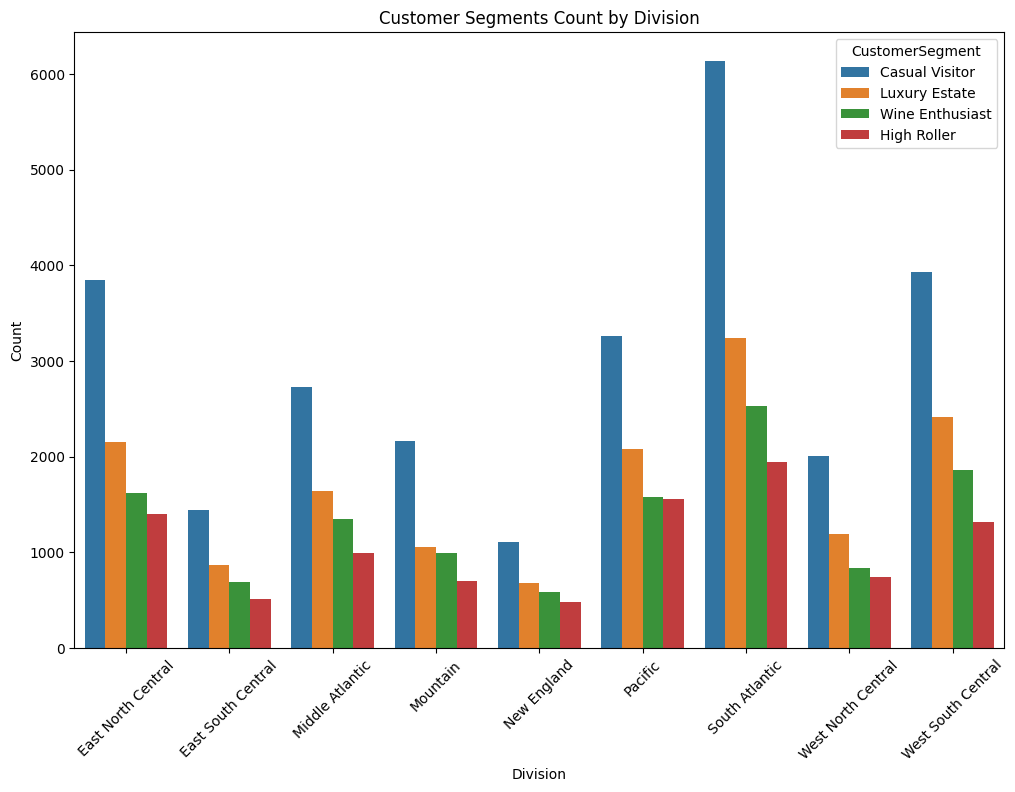

In [36]:
#Division
segment_by_division_df = segment_by_division.reset_index(name='Count')
# print(segment_by_division_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Division', y='Count', hue='CustomerSegment', data=segment_by_division_df)
plt.title('Customer Segments Count by Division')
plt.xticks(rotation=45)
plt.show()

In [37]:
#Channel sales amount by customer segments, geographic regions (states, regions, and divisions) 

print(winery.groupby(["CustomerSegment","Channel"])["SaleAmount"].sum())

print(winery.groupby(["Region","Channel"])["SaleAmount"].sum())

print(winery.groupby(["State","Channel"])["SaleAmount"].sum())

print(winery.groupby(["Division","Channel"])["SaleAmount"].sum())

CustomerSegment  Channel      
Casual Visitor   Email              17579.46
                 Newsletter        206164.43
                 TastingRoom      1452522.02
                 WinemakerCall       7230.77
High Roller      Email             123267.63
                 Newsletter         41346.69
                 TastingRoom      1369004.05
                 WinemakerCall      53788.10
Luxury Estate    Email               4825.06
                 Newsletter          4613.96
                 TastingRoom      1140333.13
                 WinemakerCall          0.00
Wine Enthusiast  Email             410214.53
                 Newsletter         45591.78
                 TastingRoom       605646.51
                 WinemakerCall       4809.15
Name: SaleAmount, dtype: float64
Region     Channel      
Midwest    Email             116197.61
           Newsletter         59612.84
           TastingRoom       903856.15
           WinemakerCall      16414.48
Northeast  Email              74900

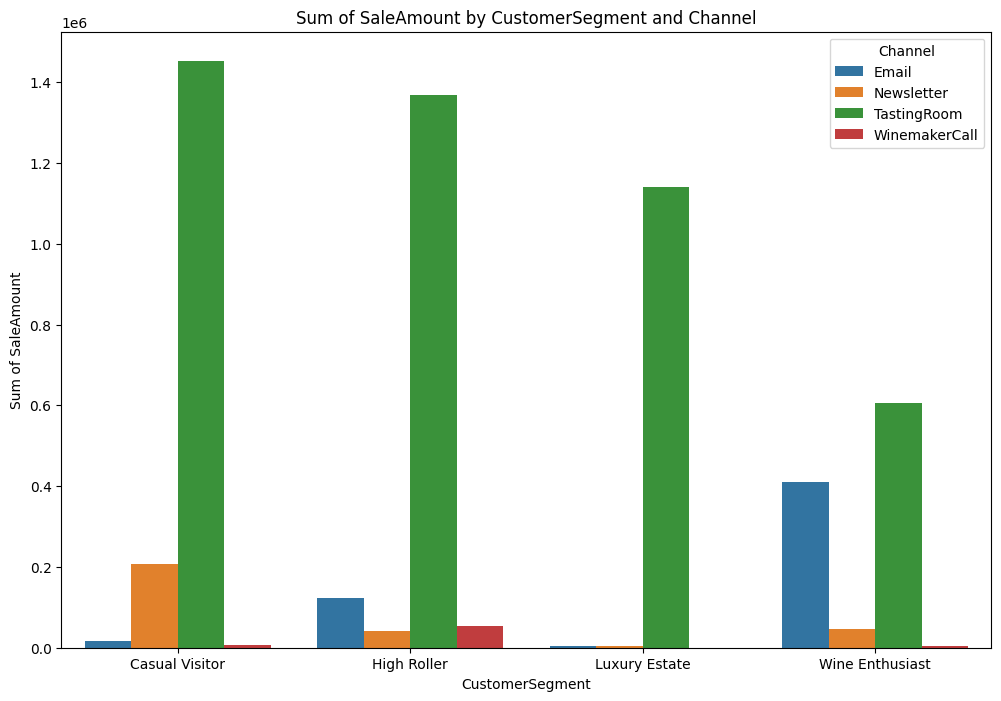

In [38]:
#1
channel_sales_by_segment = winery.groupby(["CustomerSegment", "Channel"])["SaleAmount"].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='CustomerSegment', y='SaleAmount', hue='Channel', data=channel_sales_by_segment)
plt.title('Sum of SaleAmount by CustomerSegment and Channel')
plt.xlabel('CustomerSegment')
plt.ylabel('Sum of SaleAmount')
plt.show()

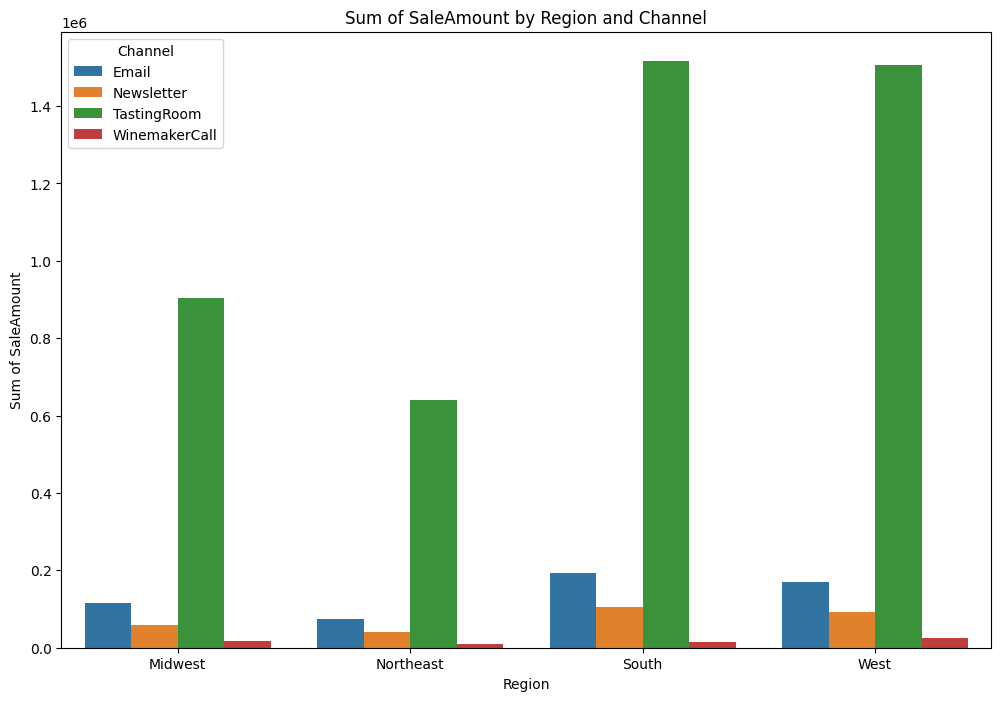

In [39]:
#2
channel_sales_by_segment = winery.groupby(["Region", "Channel"])["SaleAmount"].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='SaleAmount', hue='Channel', data=channel_sales_by_segment)
plt.title('Sum of SaleAmount by Region and Channel')
plt.xlabel('Region')
plt.ylabel('Sum of SaleAmount')
plt.show()

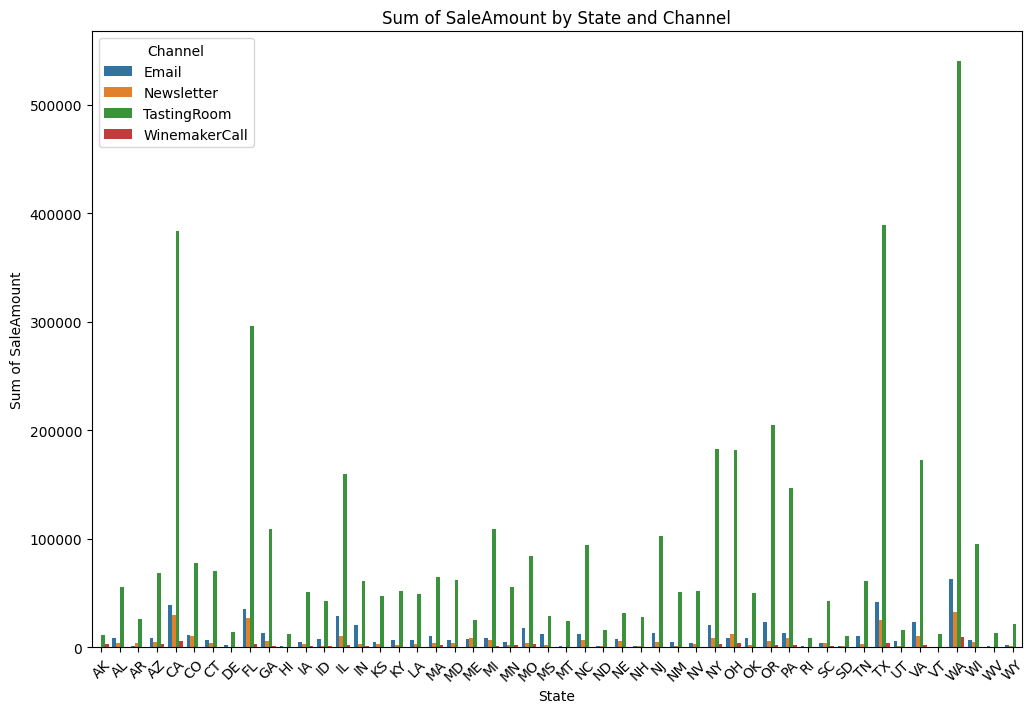

In [40]:
#3
channel_sales_by_segment = winery.groupby(["State", "Channel"])["SaleAmount"].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='SaleAmount', hue='Channel', data=channel_sales_by_segment)
plt.title('Sum of SaleAmount by State and Channel')
plt.xlabel('State')
plt.ylabel('Sum of SaleAmount')
plt.xticks(rotation=45)

plt.show()

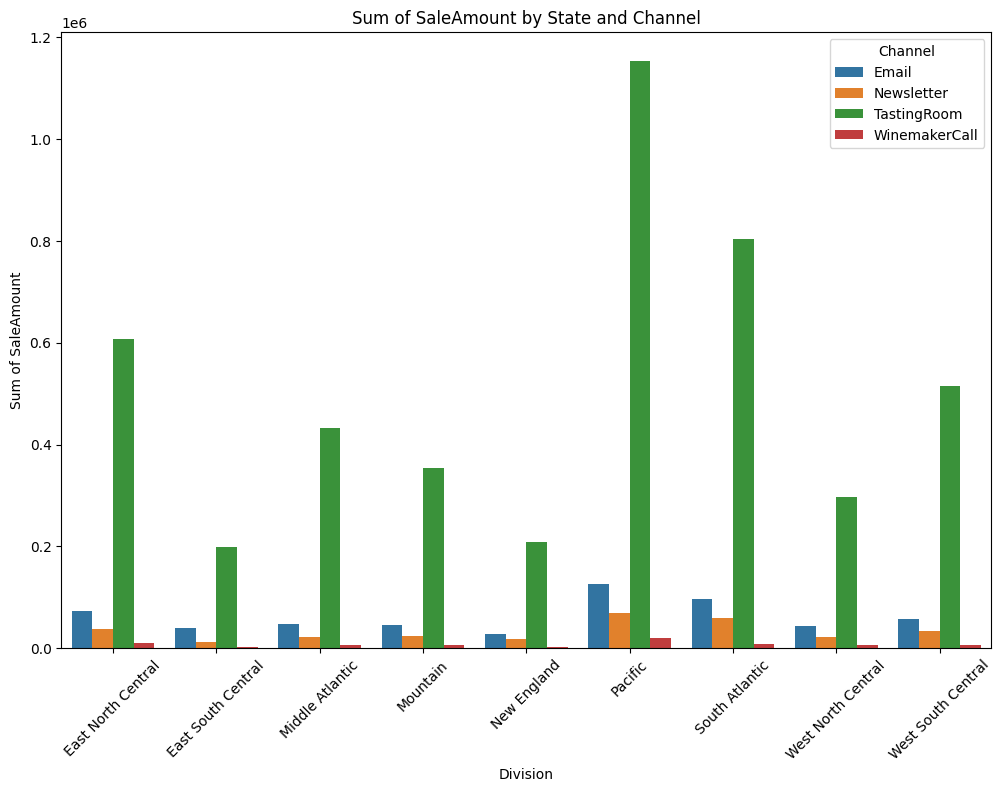

In [41]:
#4
channel_sales_by_segment = winery.groupby(["Division", "Channel"])["SaleAmount"].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Division', y='SaleAmount', hue='Channel', data=channel_sales_by_segment)
plt.title('Sum of SaleAmount by State and Channel')
plt.xlabel('Division')
plt.ylabel('Sum of SaleAmount')
plt.xticks(rotation=45)

plt.show()

In [42]:
## Volume of orders by geographic regions, channel including segments

vol_by_region_seg = winery.groupby(["Region", "CustomerSegment"])["OrderID"].count().reset_index(name='OrderVolume')
vol_by_division_seg = winery.groupby(["Division", "CustomerSegment"])["OrderID"].count().reset_index(name='OrderVolume')
vol_by_channel_seg = winery.groupby(["Channel", "CustomerSegment"])["OrderID"].count().reset_index(name='OrderVolume')

print(vol_by_channel_seg)

          Channel  CustomerSegment  OrderVolume
0           Email   Casual Visitor          291
1           Email      High Roller          722
2           Email    Luxury Estate           45
3           Email  Wine Enthusiast         4532
4      Newsletter   Casual Visitor         3164
5      Newsletter      High Roller          321
6      Newsletter    Luxury Estate           56
7      Newsletter  Wine Enthusiast          600
8     TastingRoom   Casual Visitor        23050
9     TastingRoom      High Roller         8336
10    TastingRoom    Luxury Estate        15236
11    TastingRoom  Wine Enthusiast         6875
12  WinemakerCall   Casual Visitor          129
13  WinemakerCall      High Roller          290
14  WinemakerCall    Luxury Estate            1
15  WinemakerCall  Wine Enthusiast           69


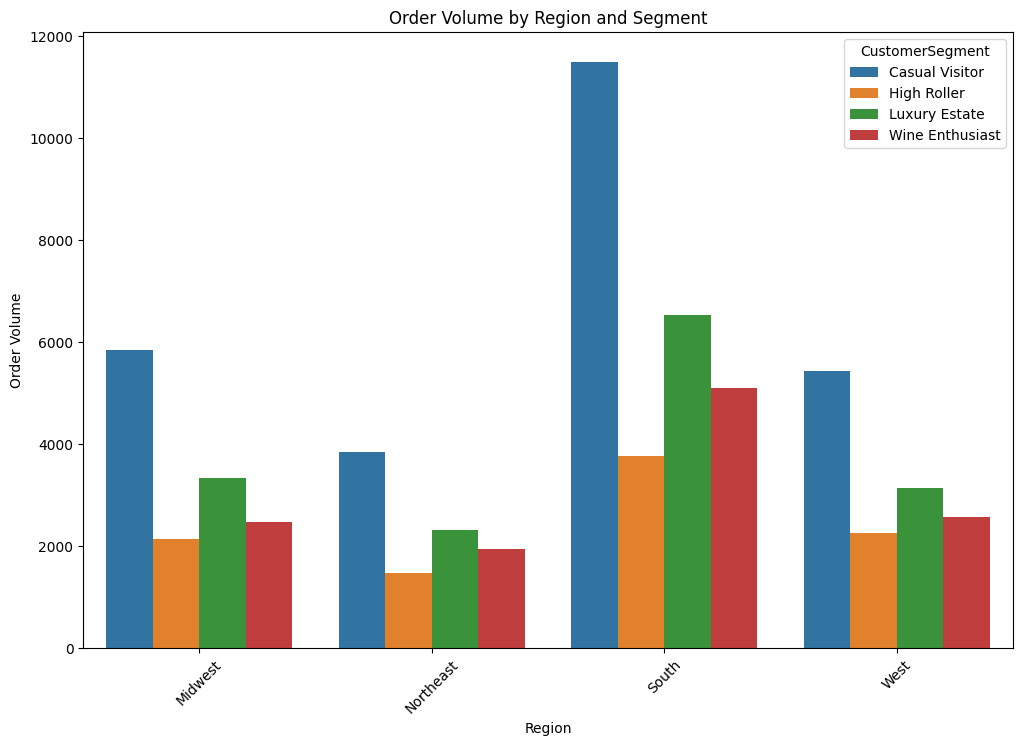

In [43]:
#region & seg

plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='OrderVolume', hue='CustomerSegment', data=vol_by_region_seg)
plt.title('Order Volume by Region and Segment')
plt.xlabel('Region')
plt.ylabel('Order Volume')
plt.xticks(rotation=45)

plt.show()

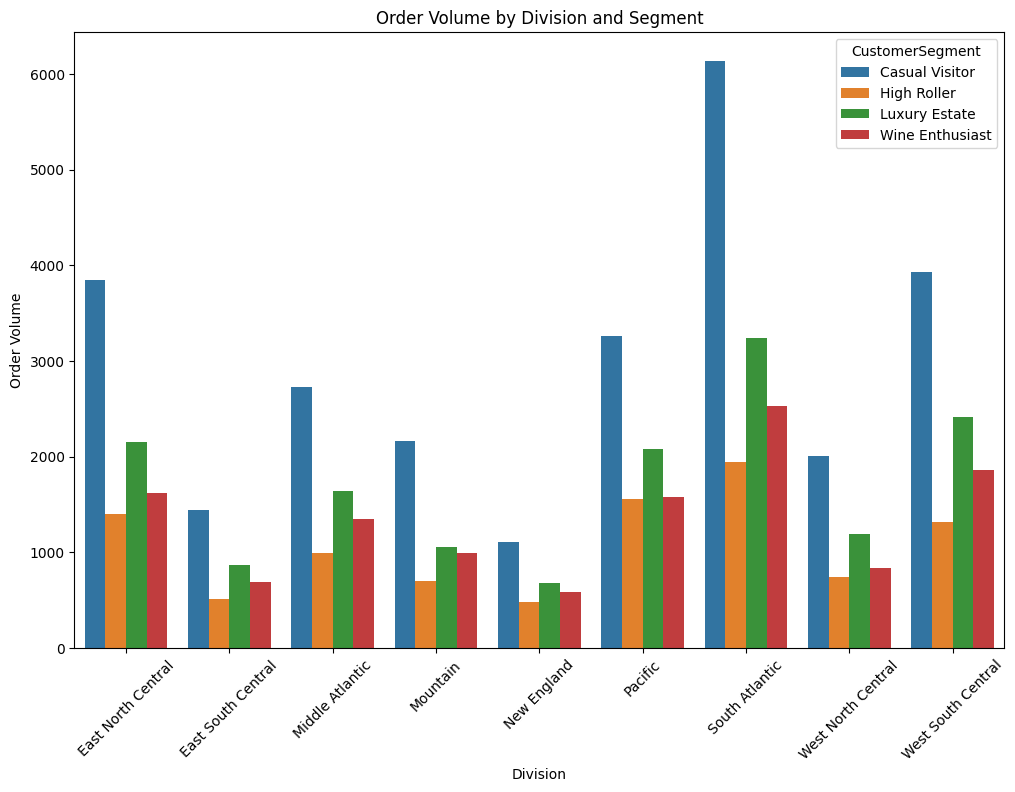

In [44]:
#division & seg

plt.figure(figsize=(12, 8))
sns.barplot(x='Division', y='OrderVolume', hue='CustomerSegment', data=vol_by_division_seg)
plt.title('Order Volume by Division and Segment')
plt.xlabel('Division')
plt.ylabel('Order Volume')
plt.xticks(rotation=45)

plt.show()

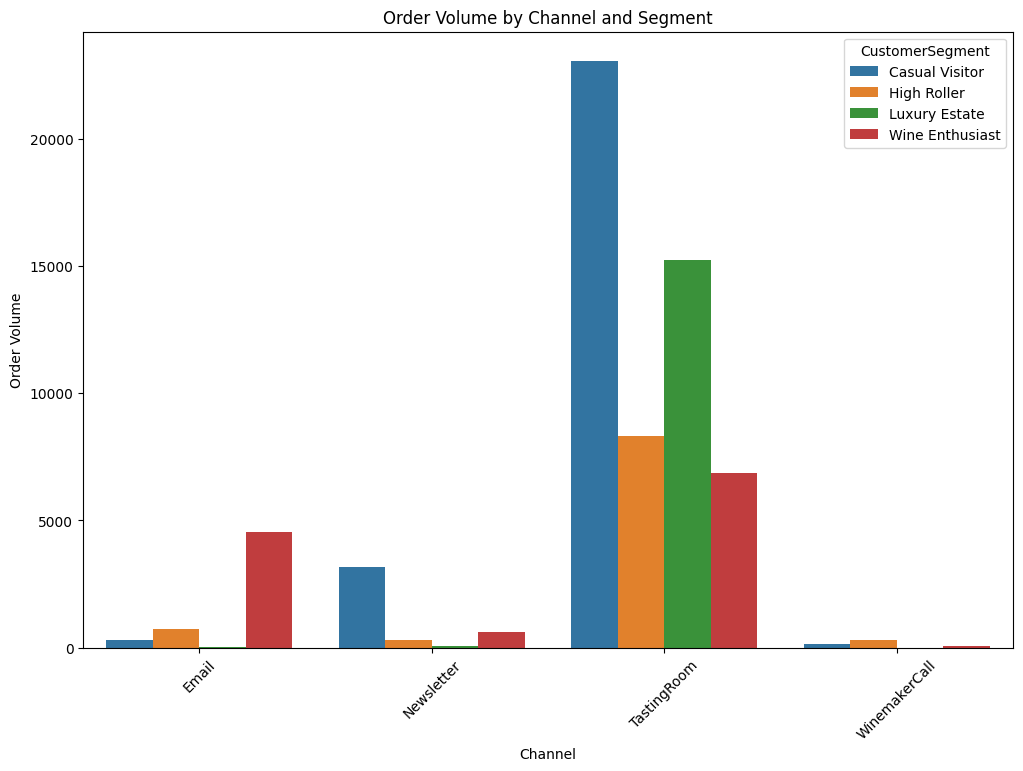

In [45]:
#channel & seg

plt.figure(figsize=(12, 8))
sns.barplot(x='Channel', y='OrderVolume', hue='CustomerSegment', data=vol_by_channel_seg)
plt.title('Order Volume by Channel and Segment')
plt.xlabel('Channel')
plt.ylabel('Order Volume')
plt.xticks(rotation=45)

plt.show()

In [46]:
# Subscription preferences by customer segments, geographic regions (states, regions, and divisions)
customer_seg_email = customer.groupby("CustomerSegment")["EmailSubscr"].value_counts().reset_index(name = "SubscrCount")
#print(customer_seg_email)

customer_seg_newsletter = customer.groupby("CustomerSegment")["NewsletterSubscr"].value_counts().reset_index(name = "SubscrCount")
#print(customer_seg_newsletter)

customer_seg_winemakercalls = customer.groupby("CustomerSegment")["WinemakerCallSubscr"].value_counts().reset_index(name = "SubscrCount")
#print(customer_seg_winemakercalls)

In [47]:
customer_reg_email = customer.groupby("Region")["EmailSubscr"].value_counts().reset_index(name = "SubscrCount")
#print(customer_reg_email)

customer_reg_newsletter = customer.groupby("Region")["NewsletterSubscr"].value_counts().reset_index(name = "SubscrCount")
#print(customer_reg_newsletter)

customer_reg_winemakercalls = customer.groupby("Region")["WinemakerCallSubscr"].value_counts().reset_index(name = "SubscrCount")
#print(customer_reg_winemakercalls)

In [48]:
customer_div_email = customer.groupby("Division")["EmailSubscr"].value_counts().reset_index(name = "SubscrCount")
#print(customer_div_email)

customer_div_newsletter = customer.groupby("Division")["NewsletterSubscr"].value_counts().reset_index(name = "SubscrCount")
#print(customer_div_newsletter)

customer_div_winemakercalls = customer.groupby("Division")["WinemakerCallSubscr"].value_counts().reset_index(name = "SubscrCount")
#print(customer_div_winemakercalls)

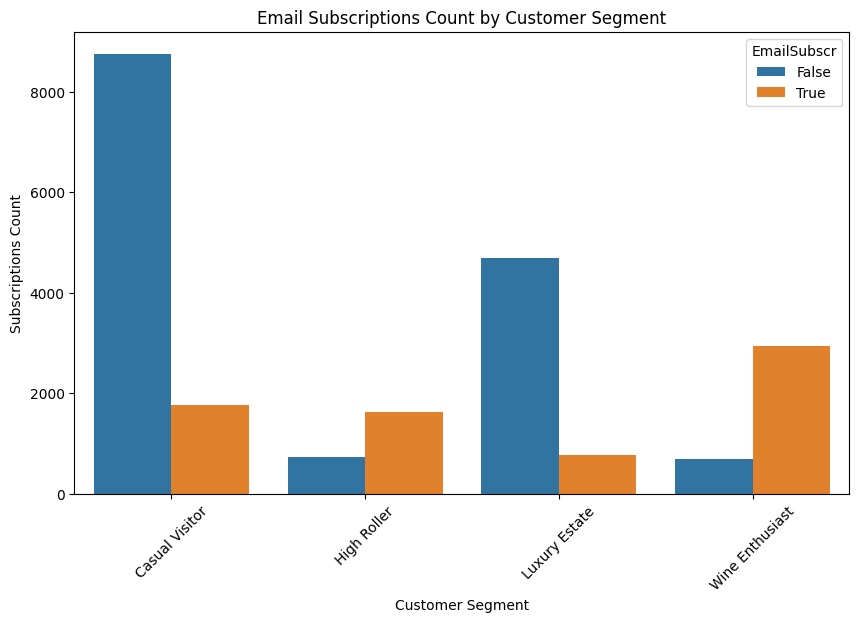

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerSegment', y='SubscrCount', hue='EmailSubscr', data=customer_seg_email)
plt.title('Email Subscriptions Count by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Subscriptions Count')
plt.xticks(rotation=45)
plt.show()

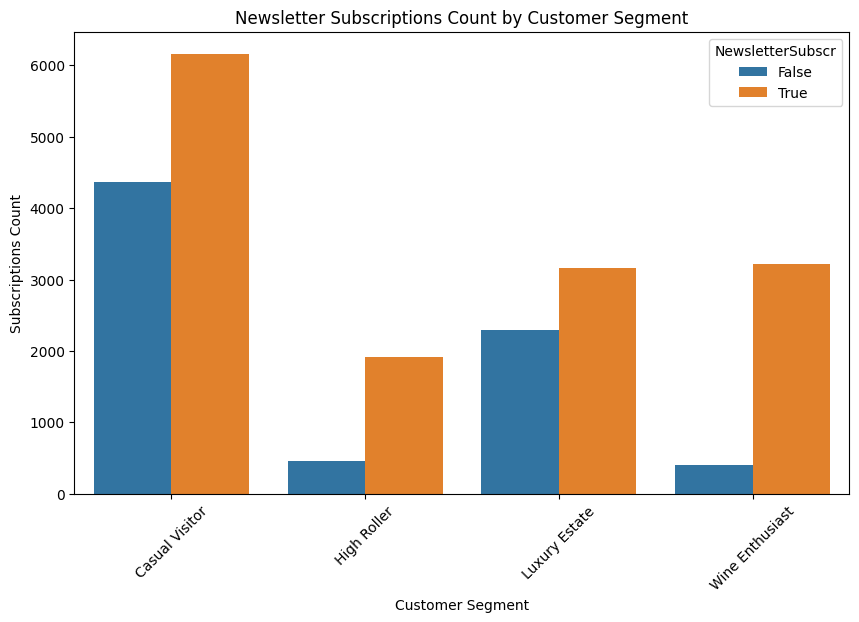

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerSegment', y='SubscrCount', hue='NewsletterSubscr', data=customer_seg_newsletter)
plt.title('Newsletter Subscriptions Count by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Subscriptions Count')
plt.xticks(rotation=45)
plt.show()

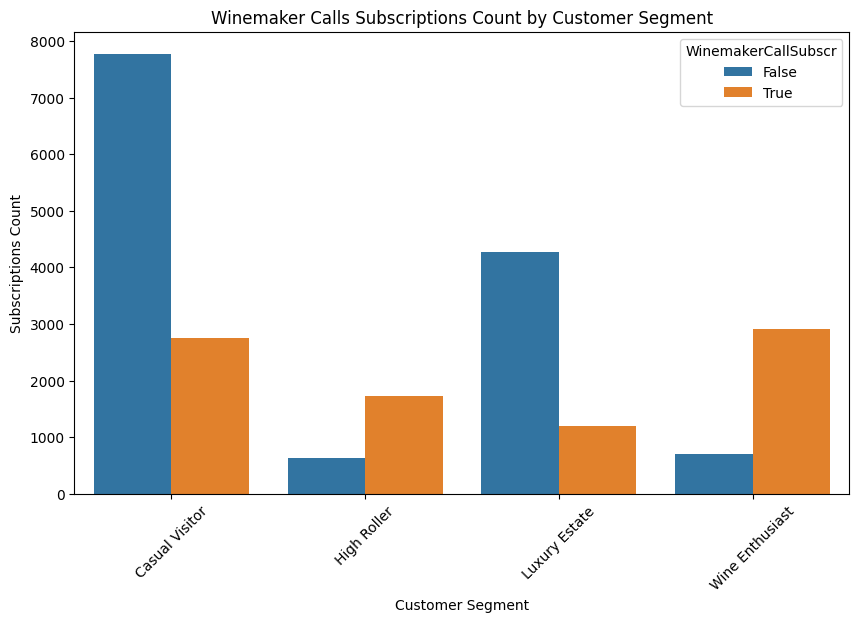

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerSegment', y='SubscrCount', hue='WinemakerCallSubscr', data=customer_seg_winemakercalls)
plt.title('Winemaker Calls Subscriptions Count by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Subscriptions Count')
plt.xticks(rotation=45)
plt.show()

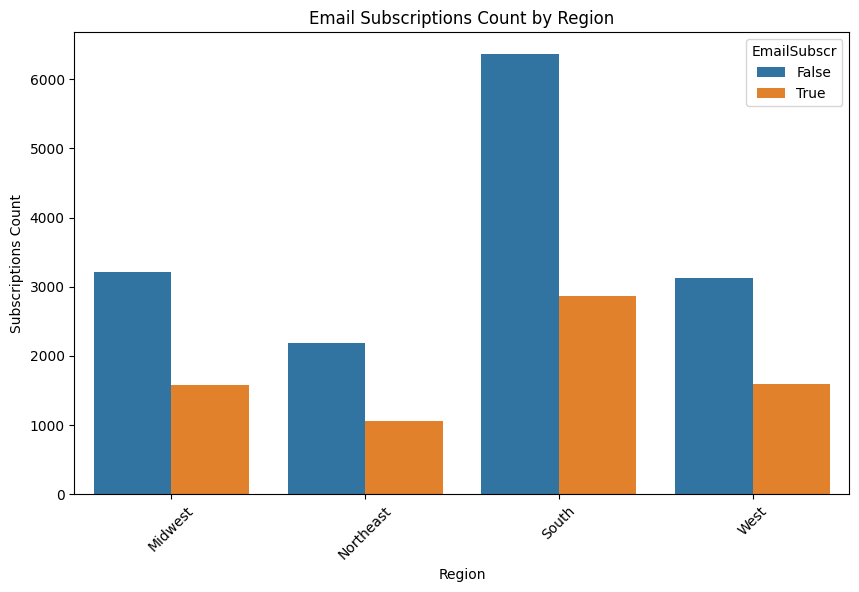

In [52]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='SubscrCount', hue='EmailSubscr', data=customer_reg_email)
plt.title('Email Subscriptions Count by Region')
plt.xlabel('Region')
plt.ylabel('Subscriptions Count')
plt.xticks(rotation=45)
plt.show()

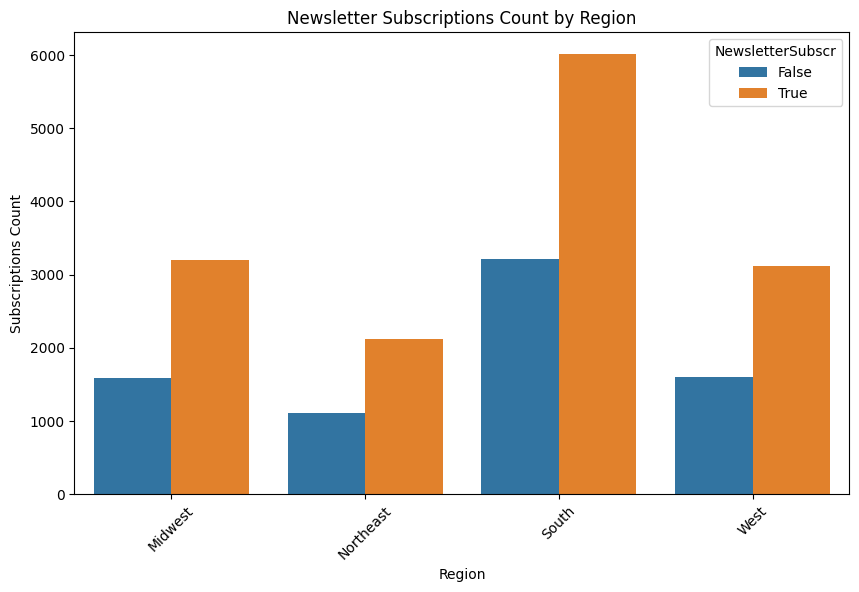

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='SubscrCount', hue='NewsletterSubscr', data=customer_reg_newsletter)
plt.title('Newsletter Subscriptions Count by Region')
plt.xlabel('Region')
plt.ylabel('Subscriptions Count')
plt.xticks(rotation=45)
plt.show()

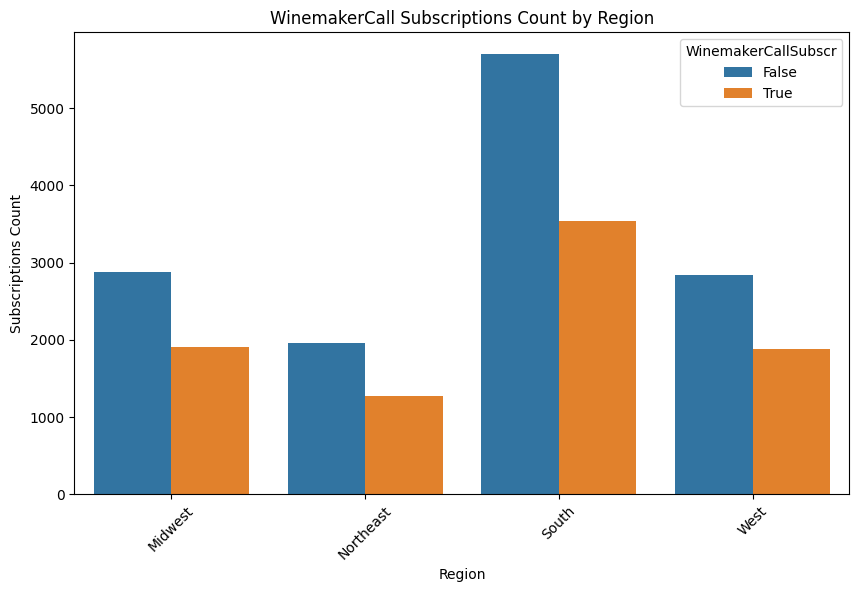

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='SubscrCount', hue='WinemakerCallSubscr', data=customer_reg_winemakercalls)
plt.title('WinemakerCall Subscriptions Count by Region')
plt.xlabel('Region')
plt.ylabel('Subscriptions Count')
plt.xticks(rotation=45)
plt.show()